In [ ]:
import math
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as numpy

1. predict whether or not a client will subscribe for a term deposit.

2. Predicting a client’s response from his/her characteristics details like age, job, education, marital status etc .

3. Here an RBF based AI implementation on bank marketing dataset is presented.

4. Classes: There is two “yes” and “no” corresponding to the response of client.



In [ ]:
Data= pd.read_table("bank-full.csv", sep= None, engine= "python")

In [ ]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


1.Numerical data columns are
 ["age","balance","day","duration","campaign","pdays","previous"]

2.Other columns are categorical we need to encode them


In [ ]:
#Data= pd.read_table("bank-full.csv", sep= None, engine= "python")
cols= ["age","balance","day","duration","campaign","pdays","previous"]
data_encode= Data.drop(cols, axis= 1)
data_encode= data_encode.apply(LabelEncoder().fit_transform)
data_rest= Data[cols]
Data= pd.concat([data_rest,data_encode], axis= 1)

## Data after encoding

In [ ]:
Data.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


# Split data as test train 

In [ ]:
data_train, data_test= train_test_split(Data, test_size= 0.33, random_state= 4)
X_train= data_train.drop("y", axis= 1)
Y_train= data_train["y"]
X_test= data_test.drop("y", axis=1)
Y_test= data_test["y"]

# StandardScale train text data

StandardScaler() will normalize the features i.e. each column of Input data, INDIVIDUALLY, so that each column/feature/variable will have μ = 0 and σ = 1.



In [ ]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

***A radial basis function (RBF)***is a real-valued function  whose value depends only on the ***distance between the input and some fixed point, either the origin, or centroid***

Examples:

1. linear radial basis function ϕ(x)=mx  
2.  multiquadrics radial basis function ϕ(x)=$\sqrt{x^2+c^2}$ 

3. Gaussian radial basis function ϕ(x)=$exp(\frac{−||x-\mu||^2)}{\sigma^2}$ ,
4.  inverse multiquadrics radial basis function ϕ(x)=$\frac{1}{\sqrt{x^2+c^2}}$

***Here we will use Gaussian radial basis function***

(348, 639, 3)


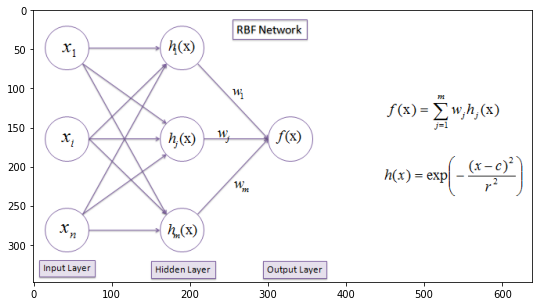

In [ ]:
import matplotlib.pyplot as plt
# read the image in 
photo=plt.imread("rbf2.png")
#lET US SEE THE SHAPE OF THE IMAGE.
plt.figure(figsize = (20,5))

print(photo.shape)
plt.imshow(photo)

RBF Architecture Explanation:
1. Each input is connected to every neuron of hiddenlayer
2. Each neuron activation function is gaussian radial basis function
$e^{\frac{-||x-\mu||^2}{\sigma^2}}$
3. Each neuron has different  mean($\mu$) .The mean is obtained from input data.

4. All neurons have same standard deviation($\sigma^2$).obtained from variation of means  of all neurons
5. output is summation of weights and neurons outputs

***Implementation:***

 Assume K clusters of Input data

***STEP1:*** Find centroids of K clusters from input data

***STEP2:*** Calculate Standard deviations of means of neurons

***STEP3:*** Find all neuron outputs  for each input in matrix form

 (Here i=number of inputs,assumed clusters=8)

$G=\begin{bmatrix} e^{\frac{-||x_1-\mu_1||^2}{\sigma^2}} & e^{\frac{-||x_1-\mu_2||^2}{\sigma^2}} &...& e^{\frac{-||x_1-\mu_8||^2}{\sigma^2}} \\ e^{\frac{-||x_2-\mu_1||^2}{\sigma^2}} & e^{\frac{-||x_2-\mu_2||^2}{\sigma^2}} &...& e^{\frac{-||x_2-\mu_8||^2}{\sigma^2}}\\..&..&...&..\\ e^{\frac{-||x_i-\mu_1||^2}{\sigma^2}} & e^{\frac{-||x_i-\mu_2||^2}{\sigma^2}} &...& e^{\frac{-||x_i-\mu_8||^2}{\sigma^2}} \end{bmatrix}
$

***STEP4:*** Calculate Weight matrix from training data output Y and G matrix

 $GW=Y$

 $W=(G^TG)^{-1}G^TY$

***STEP5:***Calculate G matrix for test data

***STEP6:*** use Weight matrix W  and G matrix of test data to estimate output of test data

$Y_{test}=G_{test}*W$


# Function used in hidden layer Neural networks

$f(x)=e^{\frac{-||x-\mu||^2}{\sigma^2}}$

1. we use Eight hidden layers 
2. Eight centroids are to be calculated for neural networks
3. Calculate Standard deviation for neural networks

#STEP1:  Eight centroids  are  calculated for every column of input data

In [ ]:
K_cent= 8
km= KMeans(n_clusters= K_cent, max_iter= 100)
km.fit(X_train)
cent= km.cluster_centers_

In [ ]:
print("\n centers.shape \n",cent.shape)
print("\n centers \n",cent)


 centers.shape 
 (8, 16)

 centers 
 [[-7.39198975e-02  2.27667308e-02 -2.13630720e-01 -2.90688560e-02
  -2.09569838e-01  2.05094871e+00  1.12166649e+00 -4.84055120e-02
   3.53258552e-02  2.67625603e-02 -1.36114790e-01  3.14444160e-01
  -6.34401434e-02 -6.12935727e-01  1.15471390e-01 -2.19587720e+00]
 [ 1.18314527e+00  4.40732377e-01  1.91187794e-02  4.74337670e-02
  -7.89745965e-02 -3.17224915e-01 -1.59866757e-01  8.61000162e-02
  -6.02215698e-01 -1.28654717e-01 -1.36114790e-01 -1.03253886e+00
  -4.32554364e-01 -2.37700573e-01 -3.92814219e-01  3.37227369e-01]
 [-5.36535437e-03 -9.29732499e-02  8.19309668e-01 -4.26280836e-01
   4.40306345e+00 -4.12426071e-01 -2.37661959e-01  4.77811056e-02
   9.25009415e-03  1.23629997e-01 -1.26772899e-01 -1.36712481e-01
  -4.60598919e-02  1.29049037e-01 -4.53793351e-01  4.44201731e-01]
 [-1.38331951e-02 -2.02228248e-01  3.73134041e-02  9.32839445e-03
  -8.95353842e-02 -3.92415776e-01 -2.20193437e-01 -8.83659627e-02
  -1.19331220e-01 -1.13241115e-01 -

#STEP2:Calculate  Standard deviation for neural network

### 1. Calculate maximum distance between eight centroids(eight hidden neurons)


### 2. Calculate standard deviation using

$\sigma=\frac{max \ distance\ between \ centroids}{\sqrt{2*\ number \ of \ centroids}}$

$\sigma=\frac{d}{\sqrt{2*M}}$


Where d is the max distance between centroids of hidden neurons

 and M is the number of hidden neurons.




In [ ]:
max=0
for i in range(K_cent):
   for j in range(K_cent):
     d= numpy.linalg.norm(cent[i]-cent[j])
     if(d> max):
        max= d
d= max
sigma= d/math.sqrt(2*K_cent)

In [ ]:
print("\n d \n",d)
print("\n  sigma\n",sigma)


 d 
 8.69030356951914

  sigma
 2.172575892379785


# STEP3:G matrix and Weight matrix

From architecture:

$\begin{bmatrix} g_{11} & g_{12} &...& g_{18} \\ g_{21} & g_{22} &...& g_{28}\\..&..&...&..\\ g_{i1} & g_{i2} &...& g_{i8} \end{bmatrix}
\begin{bmatrix} w_{1}  \\ w_{2}\\..\\ w_{8} \end{bmatrix}=\begin{bmatrix} y_{1}  \\ y_{2}\\..\\ y_{i} \end{bmatrix}$


1. Let $g_{ij}$ be an element of matrix G representing the output of $j^{th}$ neuron for $i_{th}$input vector

2. let $W_{j}$ be an element of matrix W representing the weight connecting   output neuron to $j_{th}$ hidden neuron.

3.  In Radial basis function, the activation function of output neuron  is the weighted summation of signals from hidden layer. 
4. Multiplying $i_{th}$ row of G and  column of W do the weighted summation of signals from hidden layer which is equal to signal produced by  output neuron.

$GW =Y$

Where Y is a column vector and $i_{th}$rows contain the target value of $i_{th}$ training vector.

where
$G=\begin{bmatrix} e^{\frac{-||x_1-\mu_1||^2}{\sigma^2}} & e^{\frac{-||x_1-\mu_2||^2}{\sigma^2}} &...& e^{\frac{-||x_1-\mu_8||^2}{\sigma^2}} \\ e^{\frac{-||x_2-\mu_1||^2}{\sigma^2}} & e^{\frac{-||x_2-\mu_2||^2}{\sigma^2}} &...& e^{\frac{-||x_2-\mu_8||^2}{\sigma^2}}\\..&..&...&..\\ e^{\frac{-||x_i-\mu_1||^2}{\sigma^2}} & e^{\frac{-||x_i-\mu_2||^2}{\sigma^2}} &...& e^{\frac{-||x_i-\mu_8||^2}{\sigma^2}} \end{bmatrix}
$

Here G dimensions are $30291X8$

From above equation we get weight matrix as follows

$W=(G^TG)^{-1}G^TY$

where $G^T$ is the transpose of matrix G.

Dimensions of W=8

$W=(G^TG)^{-1}G^TY$

$W=(8X30291X30291X8)(8X30291)(30291X1)=8X1$



In [ ]:
shape= X_train.shape
row= shape[0]
column= K_cent
G= numpy.empty((row,column), dtype= float)
for i in range(row):
  for j in range(column):
   dist= numpy.linalg.norm(X_train[i]-cent[j])
   G[i][j]= math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [ ]:
print("\n G \n",G[0])
print("\n G shape \n",G.shape)


 G 
 [0.16958591 0.62182742 0.11330398 0.26107021 0.35416806 0.2432684
 0.01811741 0.32704766]

 G shape 
 (30291, 8)


#STEP4: Find Weight matrix

 weight matrix formula is :

$W=(G^TG)^{-1}G^TY$

where $G^T$ is the transpose of matrix G.

In [ ]:
GTG= numpy.dot(G.T,G)
GTG_inv= numpy.linalg.inv(GTG)
fac= numpy.dot(GTG_inv,G.T)
W= numpy.dot(fac,Y_train)

In [ ]:
print("\n GTG \n",GTG.shape)
print("\n GTG_inv \n",GTG_inv.shape)
print("\n fac \n",fac.shape)
print("\n G.T \n",(G.T).shape)
print("\n Y_train \n",Y_train.shape)
print("\n W \n",W.shape)


 GTG 
 (8, 8)

 GTG_inv 
 (8, 8)

 fac 
 (8, 30291)

 G.T 
 (8, 30291)

 Y_train 
 (30291,)

 W 
 (8,)


# STEP5:find G matrix for test data

In [ ]:
row= X_test.shape[0]
column= K_cent
G_test= numpy.empty((row,column), dtype= float)
for i in range(row):
  for j in range(column):
    dist= numpy.linalg.norm(X_test[i]-cent[j])
    G_test[i][j]= math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

# STEP6:Predict outputs using G and W matrices

In [ ]:
prediction= numpy.dot(G_test,W)
prediction= 0.5*(numpy.sign(prediction-0.5)+1)
score= accuracy_score(prediction,Y_test)
print(score.mean())

0.8876675603217158


#Local representation vs Distributed representation

1. Local representation: each neuron can process some of the inputs

    Example:Radial basis Functions

    ***Receptive field***:part of input where neuron output is nonzero

2. Distributed representation:all neurons extract different features from one input

   Example:CNN


(417, 700, 3)


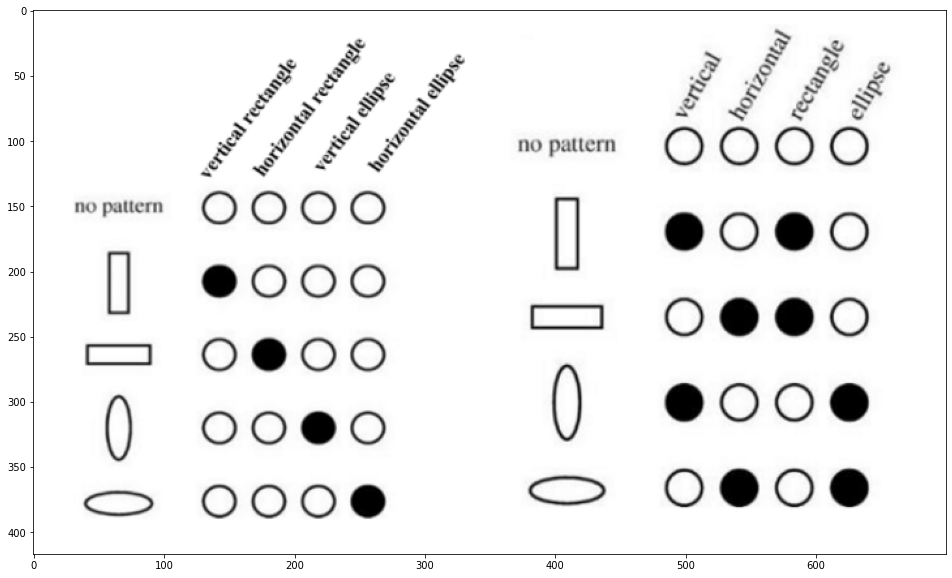

In [ ]:
# read the image in 
photo=plt.imread("rep.png")
plt.figure(figsize = (20,10))
#lET US SEE THE SHAPE OF THE IMAGE.

print(photo.shape)
plt.imshow(photo)

(525, 670, 4)


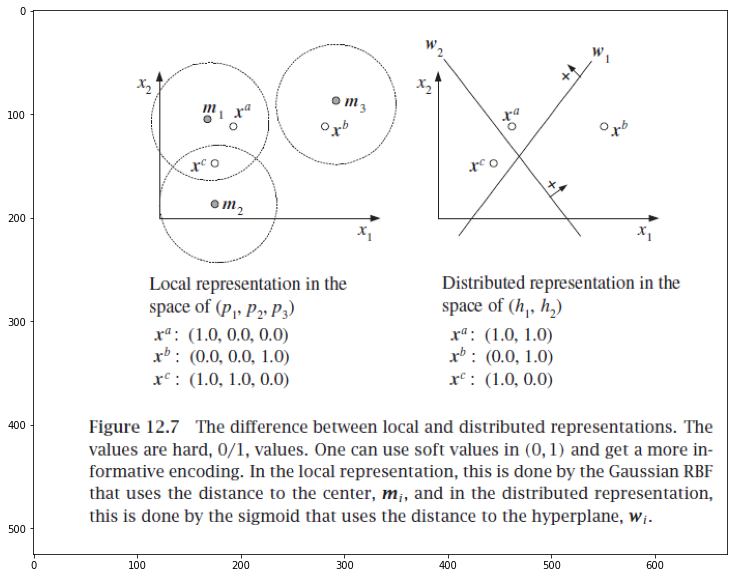

In [ ]:
# read the image in 
photo=plt.imread("rep2.png")
plt.figure(figsize = (20,10))
#lET US SEE THE SHAPE OF THE IMAGE.

print(photo.shape)
plt.imshow(photo)

# Radial Basis Function

$p^t_h= exp^{\frac{−||x_t −m_h||^2}{2s^2_h}}$

$y^t =\sum^H_{h=1}w_hp^t_h + w_0$

(432, 687, 4)


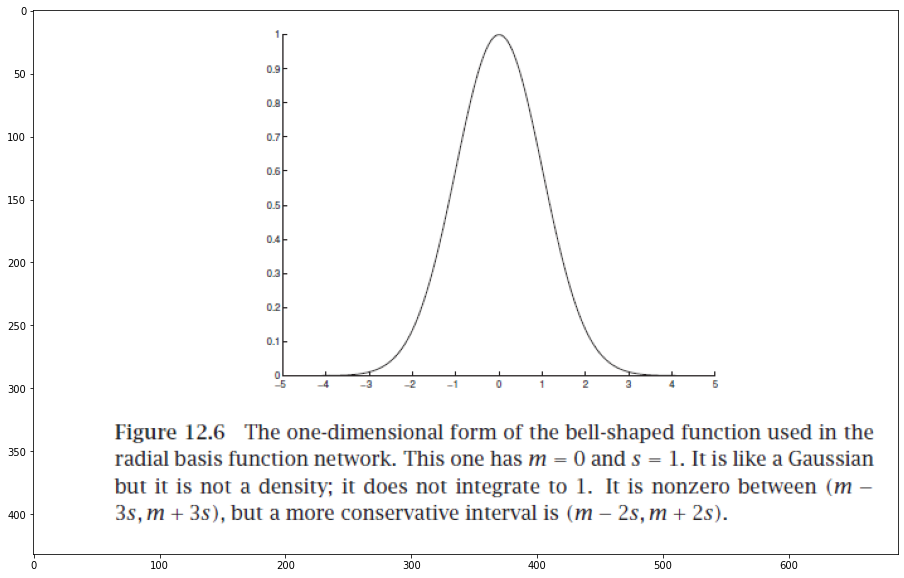

In [ ]:
# read the image in 
photo=plt.imread("rbf_func.png")
plt.figure(figsize = (20,10))
#lET US SEE THE SHAPE OF THE IMAGE.

print(photo.shape)
plt.imshow(photo)

(471, 692, 4)


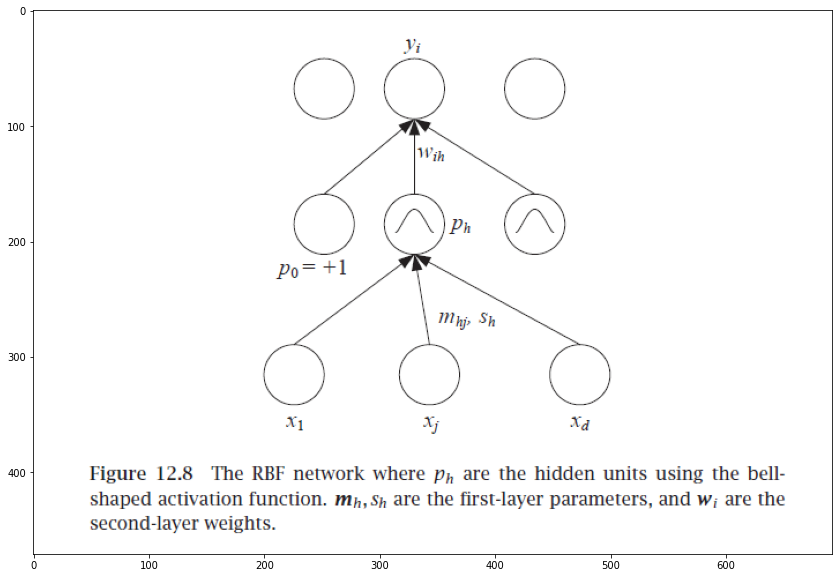

In [ ]:
# read the image in 
photo=plt.imread("rbf_nn.png")
plt.figure(figsize = (20,10))
#lET US SEE THE SHAPE OF THE IMAGE.

print(photo.shape)
plt.imshow(photo)

***Procedure***


 We use an unsupervised method
for determining the centers$m_h$ and $s_h$, then build a supervised layer on top of that.This is called ***hybrid learning.***

The structure is similar to a multilayer perceptron with $p_h$ as the hidden units, $m_h$ and $s_h$ as the first-layer parameters, the Gaussian as the activation function in the hidden layer, and $w_h$ as the second-layer weights 


***Alternative Procedure***

1. We can also learn all parameters, including
$m_h$ and $s_h$, in a supervised manner. 

2. The radial basis function equation is differentiable and we can backpropagate, just as we backpropagated
in a multilayer perceptron to update the first-layer weights.

3.  Another technique, called the anchor method, sets the centers to
the randomly chosen patterns from the training set without any further
update. 


#RBF for regression with back propagation

Formula to be used:

$E(({m_h, s_h,w_{ih}})_{i,h}|X) = \frac{1}{2}\sum_t\sum_i(r^t_i− y^t_i )^2$

where

$y^t_i=\sum^H_{h=1}w_{ih}p^t_h + w_{i0}$

weight update

$Δw_{ih} = η\sum_t(r^t_i− y^t_i )p^t_h$

Mean update

$Δm_{hj}= η\sum_t[\sum_i(r^t_i− y^t_i )w_{ih}]p^t_h\frac{(x^t_j−m_{hj}) }{s^2_h}$

standard deviation update

$Δs_{h}= η\sum_t[\sum_i(r^t_i− y^t_i )w_{ih}]p^t_h\frac{||(x^t−m_{h})||^2 }{s^3_h}$


# RBF  classification

OUTPUT:

$y^t_i=\frac{exp[\sum_h w_{ih}p^t_h+w_{i0}]}{\sum_k exp[\sum_h w_{kh}p^t_h+w_{k0}]}$

CROSS ENTROPY ERROR:

$E(({m_h, s_h,w_{ih}})_{i,h}|X) = −\sum_t\sum_ir^t_i logy^t_i$

Updates can similarly be derived using gradient descent 

# when neuron outputs are zero default value is called ***rule***

$y^t =\sum^H_{h=1}w_hp^t_h+v^T x^t + v_0$

WHEN all neurons output are zero we get rule

$y^t =v^T x^t + v_0$